In [ ]:
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 3.6MB 5.2MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy as np

import tensorflow_datasets as tfds

In [ ]:
df_train , info = tfds.load('goemotions', split='train', with_info=True)

df_test , info_test = tfds.load('goemotions', split='validation', with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incomplete1X2C2H/goemotions-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incomplete1X2C2H/goemotions-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/goemotions/0.1.0.incomplete1X2C2H/goemotions-test.tfrecord


Dataset goemotions downloaded and prepared to /root/tensorflow_datasets/goemotions/0.1.0. Subsequent calls will reuse this data.


EDA 

In [ ]:
df=tfds.as_dataframe(df_train, info)
test_df=tfds.as_dataframe(df_test, info_test)

In [ ]:
df.comment_text =df.comment_text.apply(lambda row:tf.compat.as_str_any (row))


In [ ]:
cols_target = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
      'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise']





In [ ]:
lab_to_sentiment = {True: "True", False: "False"}

def label_decoder(label):
  return lab_to_sentiment[label]

df.admiration = df.admiration.apply(lambda x: label_decoder(x))
df.head()

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
0,False,False,False,False,False,False,"It's just wholesome content, from questionable...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,This is actually awesome.,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,People really spend more than $10 in an app ga...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,I grew up on the other side of Ama but live in...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,"What the problem? I mean, steak? Good. Doughnu...",False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#for label in cols_target:
#  df[label] = df[label].apply(lambda x: label_decoder(x))

df.amusement = df.amusement.apply(lambda x: label_decoder(x))
df.anger = df.anger.apply(lambda x: label_decoder(x))
df.annoyance = df.annoyance.apply(lambda x: label_decoder(x))
df.approval = df.approval.apply(lambda x: label_decoder(x))
df.caring = df.caring.apply(lambda x: label_decoder(x))
df.confusion = df.confusion.apply(lambda x: label_decoder(x))
df.curiosity = df.curiosity.apply(lambda x: label_decoder(x))
df.desire = df.desire.apply(lambda x: label_decoder(x))
df.disappointment = df.disappointment.apply(lambda x: label_decoder(x))


df.disapproval = df.disapproval.apply(lambda x: label_decoder(x))
df.disgust = df.disgust.apply(lambda x: label_decoder(x))
df.embarrassment = df.embarrassment.apply(lambda x: label_decoder(x))
df.excitement = df.excitement.apply(lambda x: label_decoder(x))
df.fear = df.fear.apply(lambda x: label_decoder(x))
df.gratitude = df.gratitude.apply(lambda x: label_decoder(x))
df.grief = df.grief.apply(lambda x: label_decoder(x))
df.joy = df.joy.apply(lambda x: label_decoder(x))
df.love = df.love.apply(lambda x: label_decoder(x))
df.nervousness = df.nervousness.apply(lambda x: label_decoder(x))


df.neutral = df.neutral.apply(lambda x: label_decoder(x))


df.optimism = df.optimism.apply(lambda x: label_decoder(x))
df.pride = df.pride.apply(lambda x: label_decoder(x))
df.realization = df.realization.apply(lambda x: label_decoder(x))
df.relief = df.relief.apply(lambda x: label_decoder(x))
df.remorse = df.remorse.apply(lambda x: label_decoder(x))


df.sadness = df.sadness.apply(lambda x: label_decoder(x))
df.surprise = df.surprise.apply(lambda x: label_decoder(x))






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


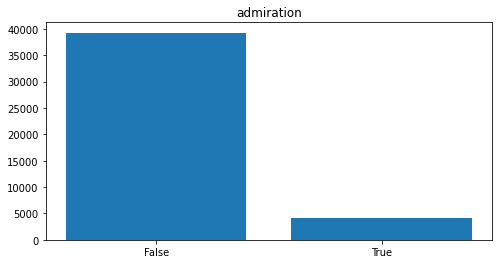

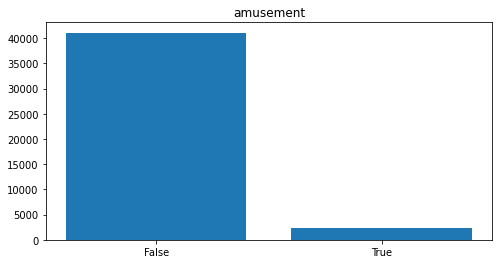

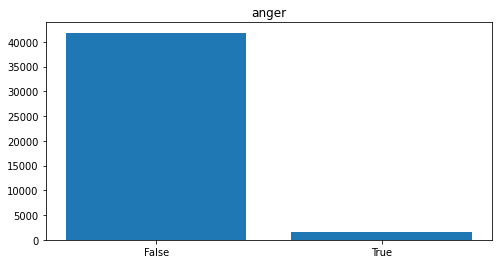

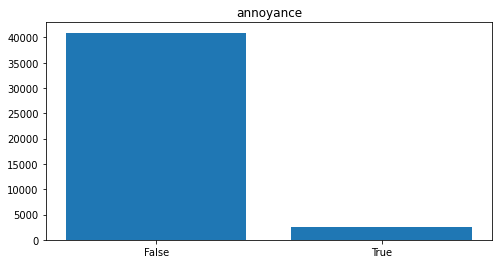

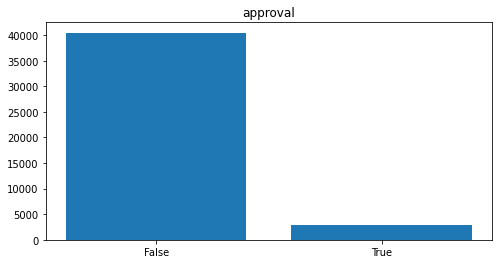

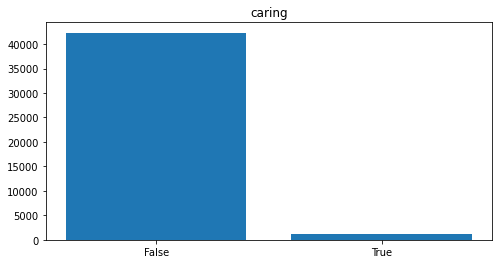

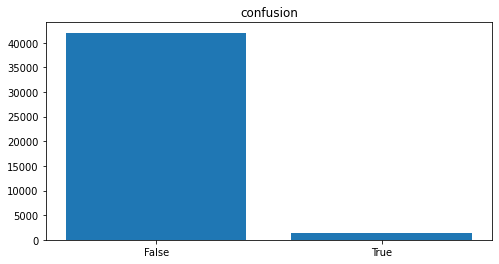

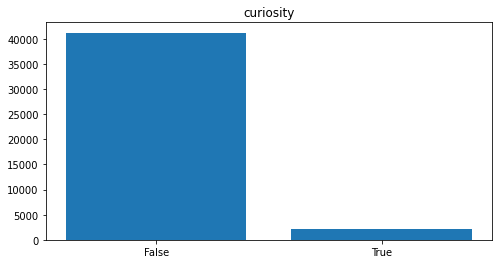

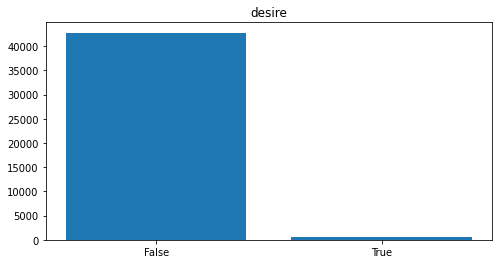

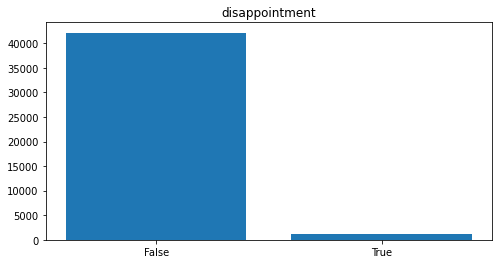

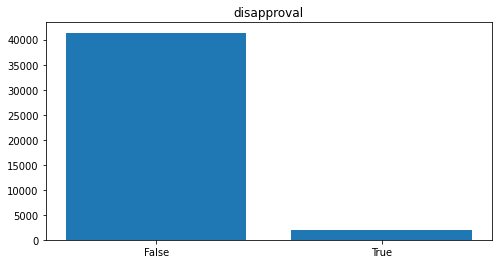

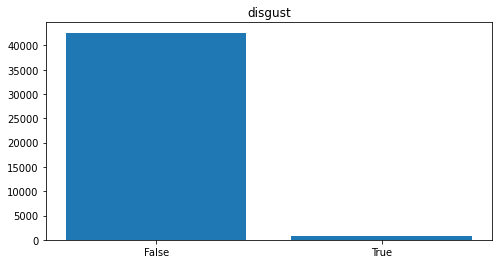

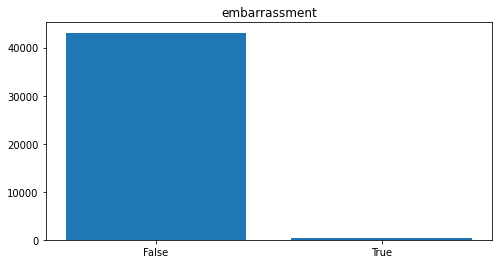

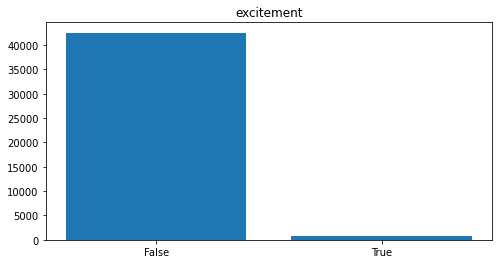

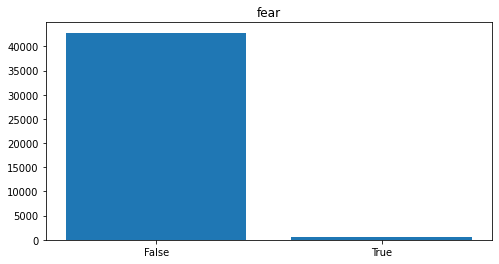

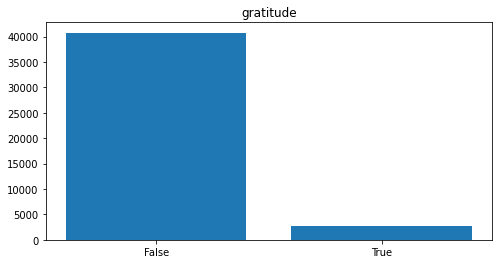

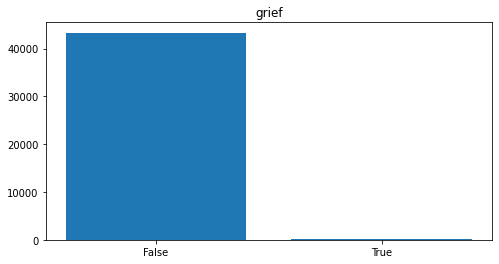

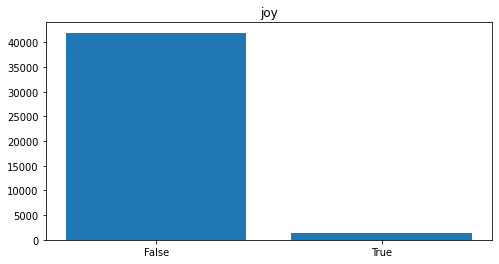

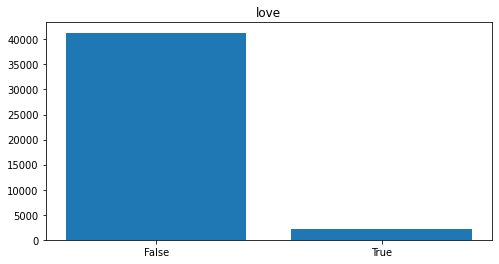

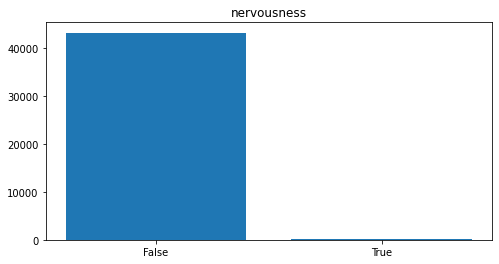

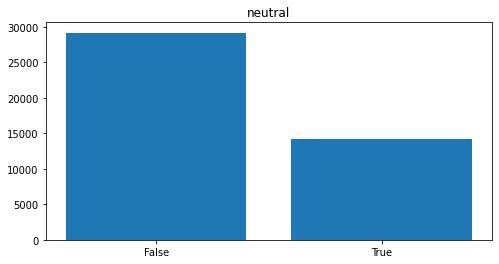

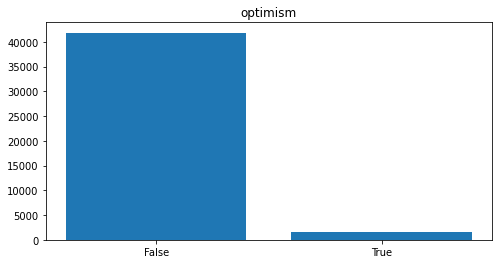

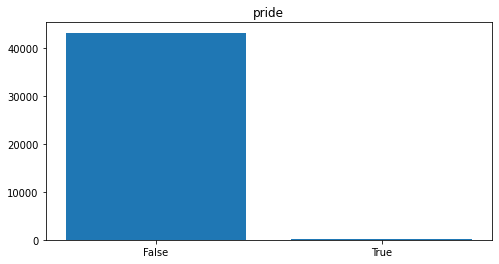

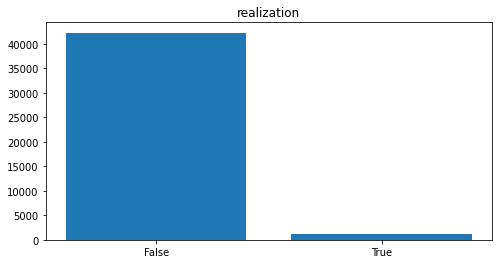

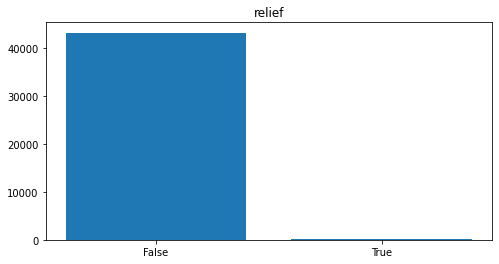

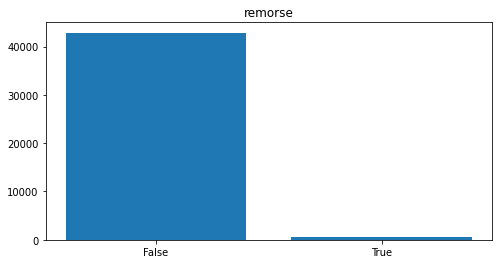

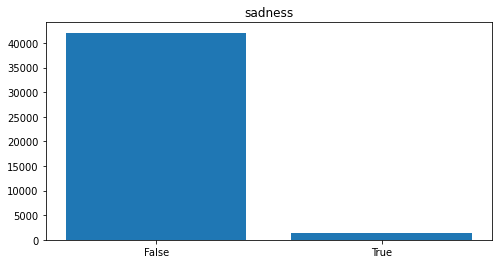

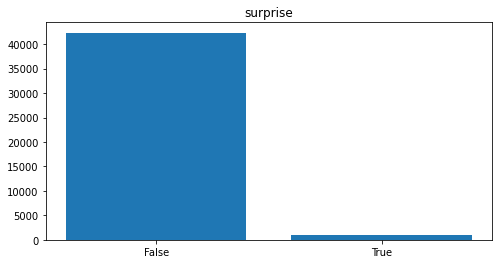

In [ ]:
for label in cols_target:
  val_count = df[label].value_counts()
  plt.figure(figsize=(8,4))
  plt.bar(val_count.index, val_count.values)
  plt.title(label)


In [ ]:
import random
random_idx_list = [random.randint(1,len(df.comment_text)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
28386,False,False,False,True,False,False,And most ironic. We created the language but p...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4915,False,False,False,False,False,False,Look at this [NAME].,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
42958,False,False,False,False,False,False,I agree. But shooting him left me feeling bad ...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
13147,False,True,False,False,False,False,Chuckle worthy. It's funny. There's at least s...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1439,False,False,False,False,False,False,what did you put for second is my real questio...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
14786,False,False,True,False,False,False,Sad for the people who contracted measles. Ang...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
37321,True,False,False,False,False,False,And good riddance!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30339,False,False,False,False,False,False,"It could be, but I hope it's abandoned. I have...",False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
36232,True,False,False,False,False,False,That was awesome. Momentum is really something...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
24251,True,False,False,False,False,False,*With Great power; comes great responsibility.*,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
print(df.comment_text.loc[34157])

Yes, when I need to get my jush, it’s freaking epic.


Text PreProcessing 

In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import re

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text):
    #text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text) # Removing the escape sequences.
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    #text = text.strip(' ') # Removing extra space at the end.
    #text = text.lower() # # lowercase to avoid difference between 'hate', 'HaTe'
    return text

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text) # Removing the escape sequences.
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "cannot ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub('\W', ' ', text)  
  
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.comment_text = df.comment_text.apply(lambda x:preprocess(x))


Postive Words

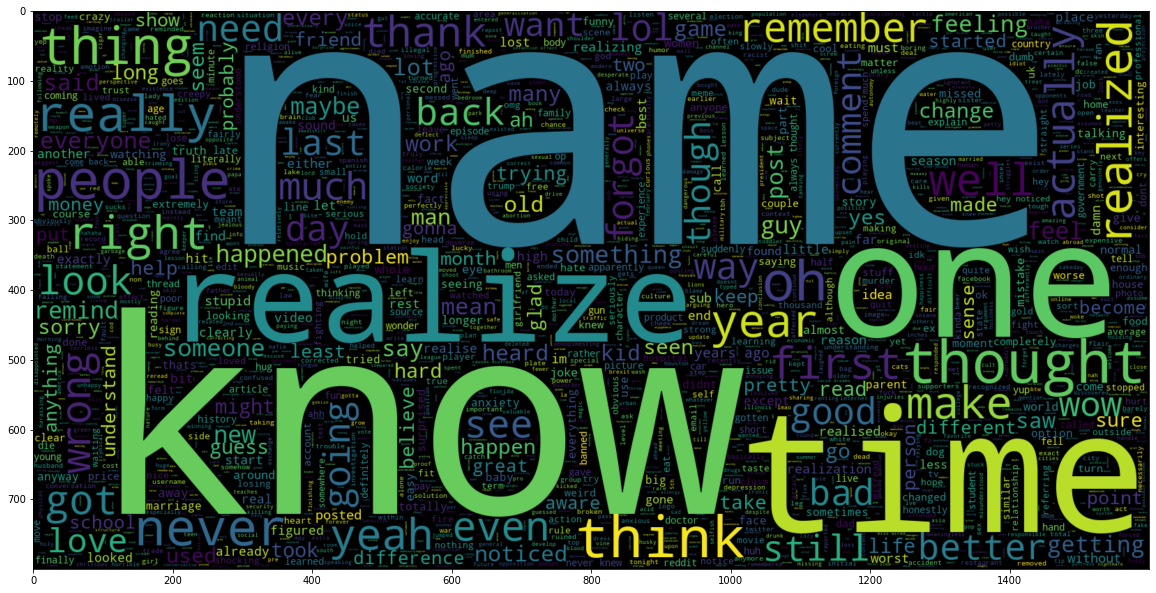

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.realization == 'True'].comment_text))
plt.imshow(wc , interpolation = 'bilinear')

Negative Words

In [ ]:
df.columns

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'comment_text', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise'],
      dtype='object')

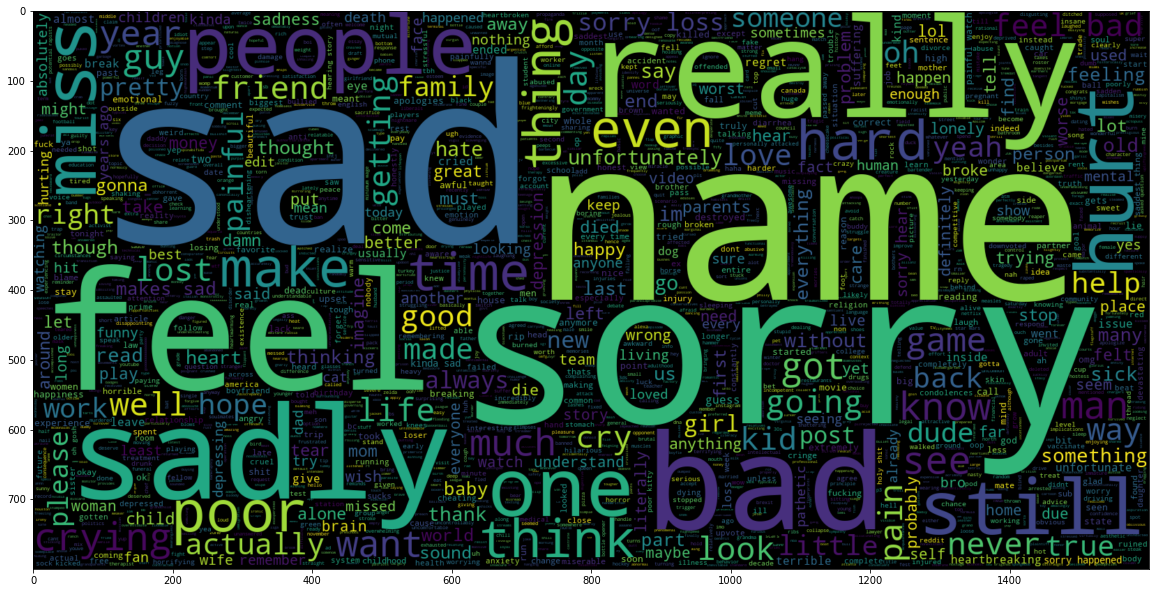

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sadness == 'True'].comment_text))
plt.imshow(wc , interpolation = 'bilinear')

Train and Test Split 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
TRAIN_SIZE = 0.7
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 30386
Test Data size 13024


In [ ]:
train_data.head(10)

,admiration,amusement,anger,annoyance,approval,caring,comment_text,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
17679,False,False,False,False,False,False,diffrence interaction literally forcing someon...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
16225,False,False,False,False,False,False,congrats part 10 000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
13594,False,False,False,False,False,False,sorry loss ever want queue pm steam,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
805,False,False,False,False,False,False,sweet release death worse getting stuck behind...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2056,False,False,False,False,False,False,looks like name baby still old man time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
43366,False,False,False,False,False,False,wait,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
22703,False,False,False,False,False,False,hope google everyone would leave already,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
15102,False,False,False,False,False,False,people opinions chronic reddit usage relationship,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
21275,True,False,False,False,False,False,watch sounds pretty cool hahaha,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11629,False,False,False,False,False,False,question 4 2 inch small erect penis answer yes,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
train_data.comment_text[21275]

'watch sounds pretty cool hahaha'

Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.comment_text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 21939


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.comment_text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.comment_text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (30386, 30)
Testing X Shape: (13024, 30)


In [ ]:
labels = train_data.admiration.unique().tolist()

In [ ]:
labels

['False', 'True']

label Encoding 

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.admiration.to_list())

y_train = encoder.transform(train_data.admiration.to_list())
y_test = encoder.transform(test_data.admiration.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (30386, 1)
y_test shape: (13024, 1)


Word Embedding 

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
GLOVE_EMB = '/content/drive/My Drive/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '/content/drive/My Drive/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

Model Training - LSTM

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

Optimizing Algorithm 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,min_lr = 0.01,monitor = 'val_loss',verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
30/30 [==============================] - 7s 222ms/step - loss: 0.3622 - accuracy: 0.8786 - val_loss: 0.2729 - val_accuracy: 0.9041
Epoch 2/10
30/30 [==============================] - 6s 204ms/step - loss: 0.2472 - accuracy: 0.9056 - val_loss: 0.2208 - val_accuracy: 0.9109
Epoch 3/10
30/30 [==============================] - 6s 207ms/step - loss: 0.2122 - accuracy: 0.9184 - val_loss: 0.1932 - val_accuracy: 0.9270
Epoch 4/10
30/30 [==============================] - 6s 200ms/step - loss: 0.1878 - accuracy: 0.9281 - val_loss: 0.1813 - val_accuracy: 0.9338
Epoch 5/10
30/30 [==============================] - 6s 210ms/step - loss: 0.1718 - accuracy: 0.9338 - val_loss: 0.1776 - val_accuracy: 0.9371
Epoch 6/10
30/30 [==============================] - 6s 214ms/step - loss: 0.1581 - accuracy: 0.9383 - val_loss: 0.1780 - val_accuracy: 0.9375
Epoch 7/10
30/30 [==============================] - 6s 213ms/step - loss: 0.1455 - accuracy: 0.9426 - val_loss: 0.1844 - val_accuracy: 0.9307
Epoch 

Model Evaluation

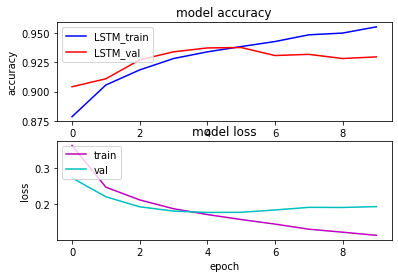

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "True" if score>0.5 else "False"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

2/2 [==============================] - 0s 36ms/step


Confusion Matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

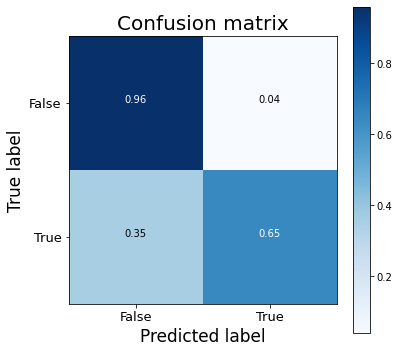

In [ ]:
cnf_matrix = confusion_matrix(test_data.admiration.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.admiration.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.admiration), y_pred_1d))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96     11775
        True       0.63      0.65      0.64      1249

    accuracy                           0.93     13024
   macro avg       0.80      0.80      0.80     13024
weighted avg       0.93      0.93      0.93     13024



In [ ]:
test_data.columns

Index(['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'comment_text', 'confusion', 'curiosity', 'desire', 'disappointment',
       'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
       'gratitude', 'grief', 'joy', 'love', 'nervousness', 'neutral',
       'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness',
       'surprise'],
      dtype='object')

In [ ]:
print("amusement")
print(classification_report(list(test_data.amusement), y_pred_1d))

print(classification_report(list(test_data.anger), y_pred_1d))

print(classification_report(list(test_data.annoyance), y_pred_1d))

print(classification_report(list(test_data.approval), y_pred_1d))

print(classification_report(list(test_data.caring), y_pred_1d))

print(classification_report(list(test_data.confusion), y_pred_1d))

print(classification_report(list(test_data.curiosity), y_pred_1d))

print(classification_report(list(test_data.desire), y_pred_1d))

print(classification_report(list(test_data.disappointment), y_pred_1d))
print(classification_report(list(test_data.disapproval), y_pred_1d))
print(classification_report(list(test_data.disgust), y_pred_1d))
print(classification_report(list(test_data.embarrassment), y_pred_1d))
print(classification_report(list(test_data.excitement), y_pred_1d))
print(classification_report(list(test_data.fear), y_pred_1d))
print(classification_report(list(test_data.gratitude), y_pred_1d))
print(classification_report(list(test_data.grief), y_pred_1d))
print(classification_report(list(test_data.joy), y_pred_1d))
print(classification_report(list(test_data.love), y_pred_1d))

print(classification_report(list(test_data.nervousness), y_pred_1d))
print(classification_report(list(test_data.neutral), y_pred_1d))
print(classification_report(list(test_data.optimism), y_pred_1d))
print(classification_report(list(test_data.pride), y_pred_1d))
print(classification_report(list(test_data.realization), y_pred_1d))
print(classification_report(list(test_data.relief), y_pred_1d))

print(classification_report(list(test_data.remorse), y_pred_1d))
print(classification_report(list(test_data.sadness), y_pred_1d))
print(classification_report(list(test_data.surprise), y_pred_1d))




amusement
              precision    recall  f1-score   support

       False       0.94      0.90      0.92     12333
        True       0.02      0.05      0.03       691

    accuracy                           0.85     13024
   macro avg       0.48      0.47      0.48     13024
weighted avg       0.90      0.85      0.87     13024

              precision    recall  f1-score   support

       False       0.96      0.90      0.93     12567
        True       0.00      0.01      0.01       457

    accuracy                           0.87     13024
   macro avg       0.48      0.45      0.47     13024
weighted avg       0.93      0.87      0.90     13024

              precision    recall  f1-score   support

       False       0.94      0.90      0.92     12322
        True       0.02      0.03      0.02       702

    accuracy                           0.85     13024
   macro avg       0.48      0.46      0.47     13024
weighted avg       0.89      0.85      0.87     13024

         

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6981253952546995563
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 1270603555471324331
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6449126302913263253
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15695488000
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2363222416060832106
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1
